Assignment 1: Descriptive Statistics and Probability Theory

- Task is to clean the data as you see fit, 
- and conduct exploratory analysis which will help the company build a sales strategy for the following year.

In addition to the analysis,  following questions responses are added as marked down in the end

1) What conclusions can you draw about sales performance of various products and regions?
2) What recommendations do you have for the business?
3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Sales Data file from local source

In [2]:
df2 = pd.read_csv('C:/Users/Saima Rafi/Desktop/York/Data Science/Assignment/sales_data.csv')

To view the dataset

In [3]:
df2

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


Updating headers  name in below context where space was available so the same can be use easily and accessible in code

In [4]:
df2=df2.rename(columns={'Units Sold':'Units_Sold'})
df2=df2.rename(columns={'Sale Date':'Sale_Date'})
df2

,Product,Region,Price,Units_Sold,Sale_Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


info()  is used to understand data quality type and statistics, as per below it is reflected that there are blank fileds available in Product, Region, Price and Units_sold column

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units_Sold  946 non-null    float64
 4   Sale_Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [6]:
df2.describe()

,Price,Units_Sold
count,945.000000,946.000000
mean,107.598688,10.048626
std,124.020322,3.172261
min,0.200000,2.000000
25%,29.430000,8.000000
50%,78.130000,10.000000
75%,142.570000,12.000000
max,2143.300000,22.000000


In [7]:
df2.isna().count()

Product       1050
Region        1050
Price         1050
Units_Sold    1050
Sale_Date     1050
dtype: int64

Visulaizing the data to identify issues and outlier

<Axes: xlabel='Price', ylabel='Count'>

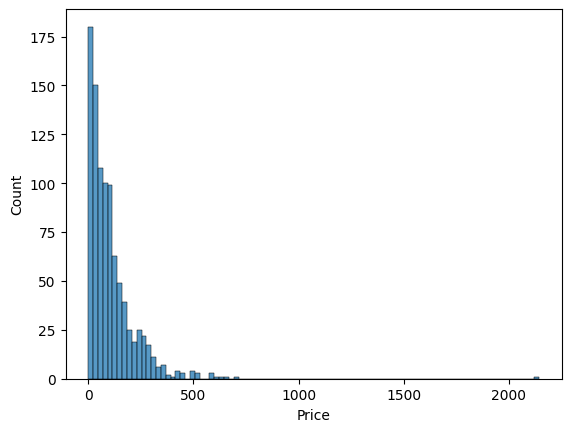

In [11]:
sns.histplot(df2.Price)

<Axes: xlabel='Units_Sold', ylabel='Count'>

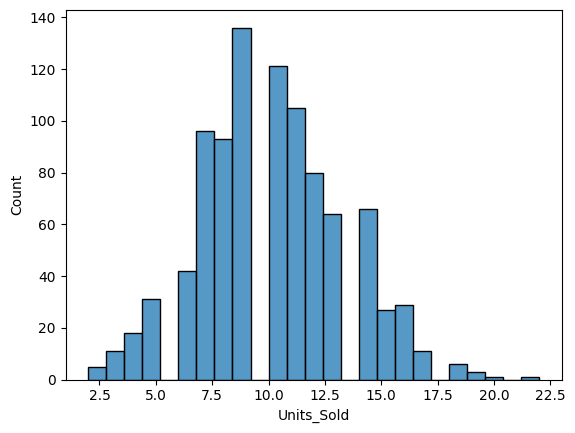

In [12]:
sns.histplot(df2.Units_Sold)

below boxplot are vizulaized on Price and Units_Sold filed to view if any outlier exisits

<Axes: >

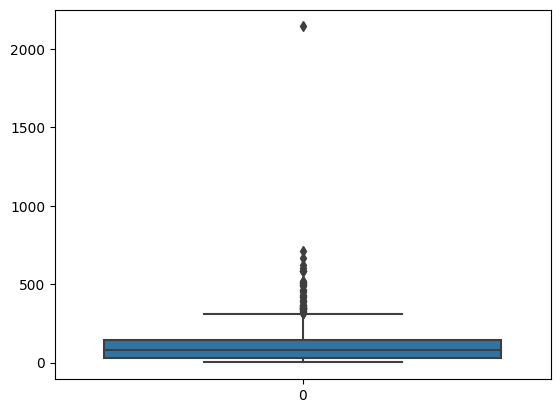

In [9]:
sns.boxplot(df2.Price)

<Axes: >

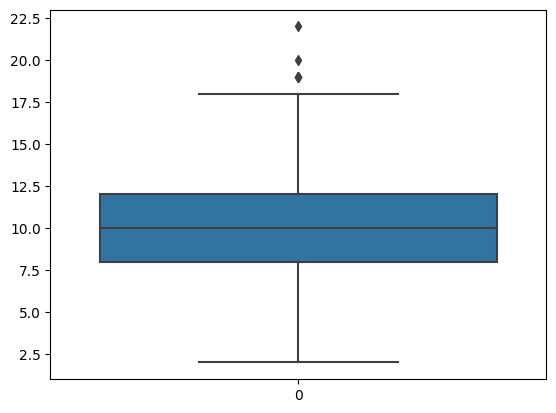

In [10]:
sns.boxplot(df2.Units_Sold)

In [13]:
max_values = df2.Price.max()
print(max_values)

2143.3


Copying dataframe in df3 as data will be adjusted for further analysis

In [14]:
df3=df2

Replacing missing values in Price and Units_Sold column by mean and median of respective column

In [15]:
df3['Price'] = df3['Price'].fillna(df3['Price'].mean())
df3['Units_Sold'] = df3['Units_Sold'].fillna(df3['Units_Sold'].median())

Dropping the maximum value from Price column

In [16]:
df3 = df3.loc[df3['Price']!=df3['Price'].max()]
df3

,Product,Region,Price,Units_Sold,Sale_Date
0,NaN,Region_6,75.960000,10.0,2022-01-01
1,NaN,Region_1,175.780000,8.0,2022-01-02
2,Product_46,Region_3,20.430000,12.0,2022-01-03
3,Product_36,Region_1,12.770000,10.0,2022-01-04
4,Product_17,Region_6,125.690000,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.690000,8.0,2022-07-28
1046,Product_1,Region_6,107.598688,8.0,2022-08-02
1047,Product_17,Region_2,114.370000,11.0,2023-12-18
1048,NaN,Region_8,107.598688,5.0,2023-12-27


In [17]:
df3.info()
df3.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1049 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     946 non-null    object 
 1   Region      945 non-null    object 
 2   Price       1049 non-null   float64
 3   Units_Sold  1049 non-null   float64
 4   Sale_Date   1049 non-null   object 
dtypes: float64(2), object(3)
memory usage: 49.2+ KB


,Price,Units_Sold
count,1049.000000,1049.000000
mean,105.658076,10.048618
std,99.481824,3.008341
min,0.200000,2.000000
25%,33.850000,8.000000
50%,88.440000,10.000000
75%,133.150000,12.000000
max,713.290000,22.000000


Visualizing the data for further issues and outlier consideration after adjusting Price and Sales_Units column by using mean for NaN and Maximum price drop

<Axes: xlabel='Price', ylabel='Count'>

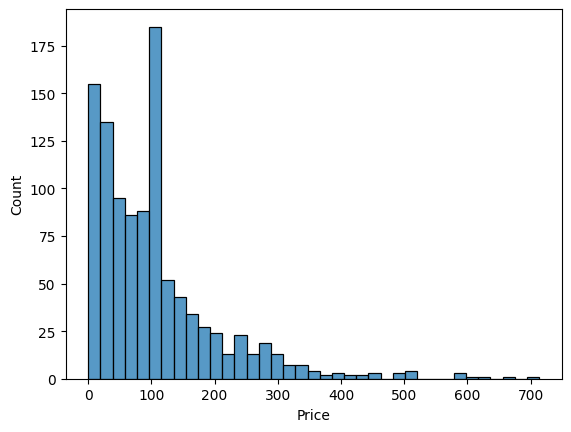

In [18]:
sns.histplot(df3.Price)

<Axes: xlabel='Units_Sold', ylabel='Count'>

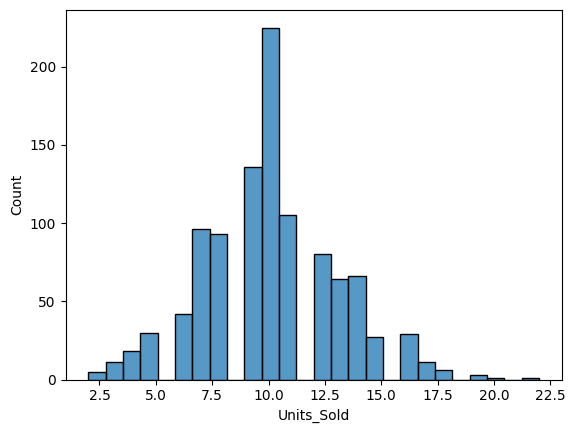

In [19]:
sns.histplot(df3.Units_Sold)

<Axes: >

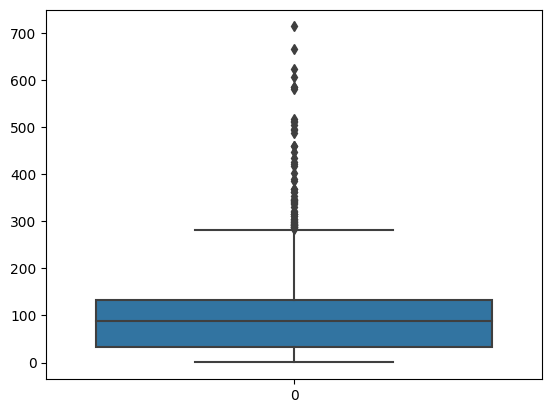

In [20]:
sns.boxplot(df3.Price)

<Axes: >

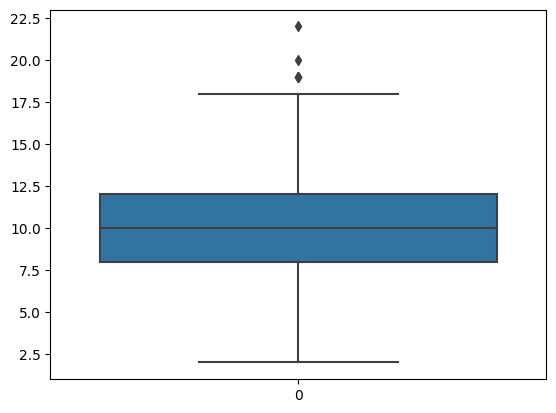

In [21]:
sns.boxplot(df3.Units_Sold)

Adding and calculating Sales_Value Column

In [22]:
Sales_Values = df3.Price * df3.Units_Sold

In [23]:
df3['Sales_Value'] = Sales_Values

C:\Users\Saima Rafi\AppData\Local\Temp\ipykernel_18404\4216362870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Sales_Value'] = Sales_Values


In [24]:
df3

,Product,Region,Price,Units_Sold,Sale_Date,Sales_Value
0,NaN,Region_6,75.960000,10.0,2022-01-01,759.600000
1,NaN,Region_1,175.780000,8.0,2022-01-02,1406.240000
2,Product_46,Region_3,20.430000,12.0,2022-01-03,245.160000
3,Product_36,Region_1,12.770000,10.0,2022-01-04,127.700000
4,Product_17,Region_6,125.690000,6.0,2022-01-05,754.140000
...,...,...,...,...,...,...
1045,Product_45,Region_7,78.690000,8.0,2022-07-28,629.520000
1046,Product_1,Region_6,107.598688,8.0,2022-08-02,860.789503
1047,Product_17,Region_2,114.370000,11.0,2023-12-18,1258.070000
1048,NaN,Region_8,107.598688,5.0,2023-12-27,537.993439


Below further analysis are followed
Identify Top Performer by Product
    Analyzing which Products gives contributed to Sales_Values
    Analyzing Top sold Product by demand/ count

Analyzing which Region gives contributed to Sales_Values
    Analyzing Top sold Region by demand/ count


In [95]:
df3.groupby('Product', as_index=False)[['Sales_Value']].sum()

,Product,Sales_Value
0,Product_1,23252.214074
1,Product_10,16773.060635
2,Product_11,11521.766878
3,Product_12,14101.783079
4,Product_13,20534.174074
5,Product_14,28715.554254
6,Product_15,18497.677016
7,Product_16,22810.821630
8,Product_17,17841.334254
9,Product_18,10355.310815


In [85]:
df4 = df3.groupby('Product', as_index=False)['Sales_Value'].sum().sort_values(by=['Sales_Value']).tail(5)
df4
                                                                                                                    

,Product,Sales_Value
5,Product_14,28715.554254
23,Product_30,30767.330000
21,Product_29,30907.226878
18,Product_26,31453.562127
24,Product_31,31616.330000


<Axes: xlabel='Product'>

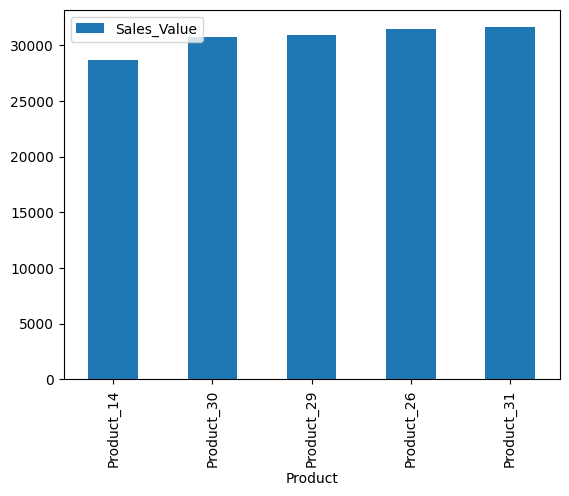

In [89]:
df4.set_index('Product', inplace=True)
df4.plot(kind='bar', stacked= True)

In [100]:
df3.groupby('Product', as_index=False)[['Units_Sold']].sum()
df4 = df3.groupby('Product', as_index=False)['Units_Sold'].sum().sort_values(by=['Units_Sold']).tail(5)
df4

,Product,Units_Sold
39,Product_45,253.0
0,Product_1,255.0
23,Product_30,260.0
44,Product_5,260.0
4,Product_13,261.0


<Axes: xlabel='Product'>

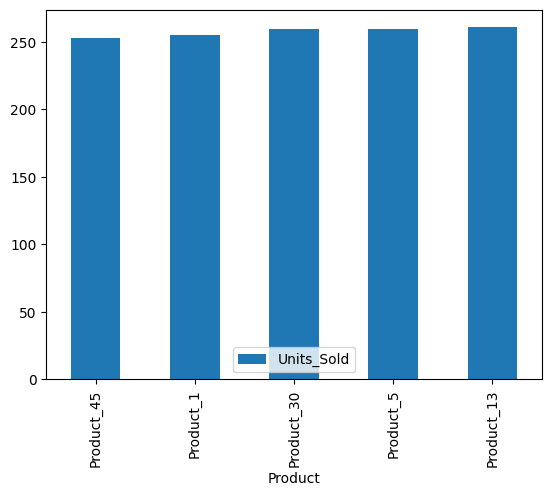

In [92]:
df4.set_index('Product', inplace=True)
df4.plot(kind='bar', stacked= True)

In [96]:
df3.groupby('Region', as_index=False)[['Sales_Value']].sum()

,Region,Sales_Value
0,Region_1,87256.076656
1,Region_10,109648.077788
2,Region_2,101956.608963
3,Region_3,90123.984804
4,Region_4,105547.790730
5,Region_5,101414.102042
6,Region_6,79573.655661
7,Region_7,71243.315026
8,Region_8,129235.435661
9,Region_9,115733.374571


<Axes: xlabel='Region'>

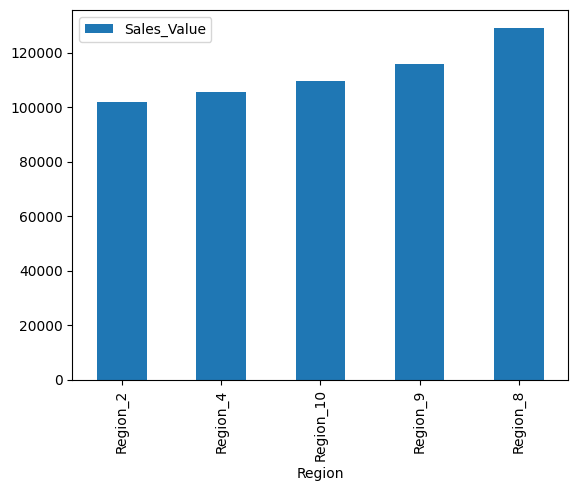

In [97]:
df5 = df3.groupby('Region', as_index=False)['Sales_Value'].sum().sort_values(by=['Sales_Value']).tail(5)
df5.set_index('Region', inplace=True)
df5.plot(kind='bar', stacked= True)

<Axes: xlabel='Region'>

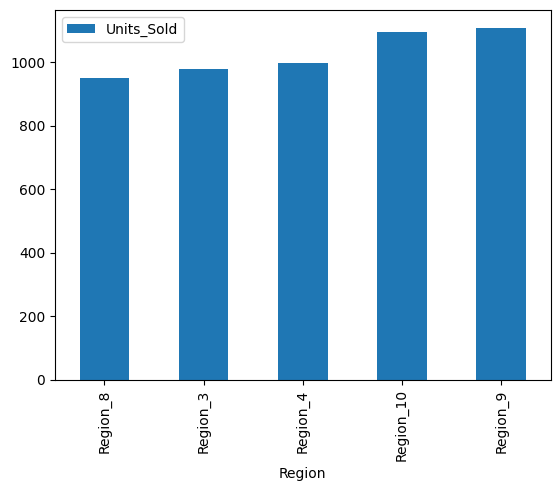

In [99]:
df5 = df3.groupby('Region', as_index=False)['Units_Sold'].sum().sort_values(by=['Units_Sold']).tail(5)
df5.set_index('Region', inplace=True)
df5.plot(kind='bar', stacked= True)

What conclusions can you draw about sales performance of various products and regions?

    Top 3 products by Sales_Values are Product_31, Product_26, Product_29, respectively  whereas based on the Units_Sold Top 3 products which are in demand are Product_13, Product_5, Product_30.

    Similarly, Top 3 regions  are Region_8, Region_9 and Region_10 which are contributing towards Sales_Values whereas Top 3 Regions which has higher Unit_Solds are Region_9, Region_10 and Region_4.

   

2) What recommendations do you have for the business?

    Excluding Top performing Product and Region, other remaining products are region requires further analysis to determine if they remain efficient and cost effective for business viability.

    

3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

    I decided to make the following changes as part of the cleaning
        1.  Dropped one outlier from Price Column which was extremely out of the remaining data set
        2.  Replacing missing values (i.e. NaN' ) in Price and Units_Sold column by mean and median of respective column
        
        Total 103 Product and 104 Region data filed remain blank (i.e. NaN) which is ~10% of data however    
        Product and Region data cleaning has not been made based as based on assumption this may skew the data outcome in favor/ against a product or Region and remain not viable for the business recommendation.


    